In [1]:
import cv2
import os
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import my_fingerprint as fp

In [2]:
from glob import glob
from os.path import join

train_path = 'train_ref'
test2_path = 'test2'

list_train = sorted(glob(join(train_path, '*.BMP')))
list_test2 = sorted(glob(join(test2_path, '*.BMP')))
print(len(list_train), len(list_test2))

477 1428


test2/100_type1.BMP 100 train_ref/100.BMP


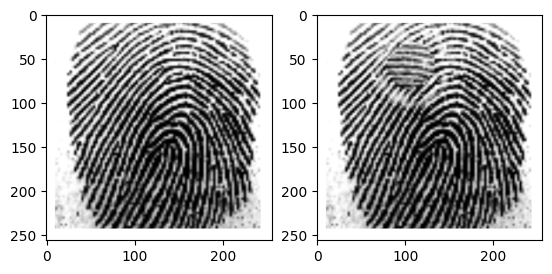

In [3]:
target_path = list_test2[0]
basename = os.path.basename(target_path).split('_')[0]
train_sample_path = join(train_path, basename + '.BMP')
print(target_path, basename, train_sample_path)
img_train = cv2.imread(train_sample_path, 0)
img_test = cv2.imread(target_path, 0)

plt.subplot(121)
plt.imshow(img_train, cmap='gray')
plt.subplot(122)
plt.imshow(img_test, cmap='gray')

In [4]:
image = cv2.imread("001_00.png", 0)

### Feature detection

CPU times: user 45 ms, sys: 2.66 ms, total: 47.6 ms
Wall time: 47.7 ms


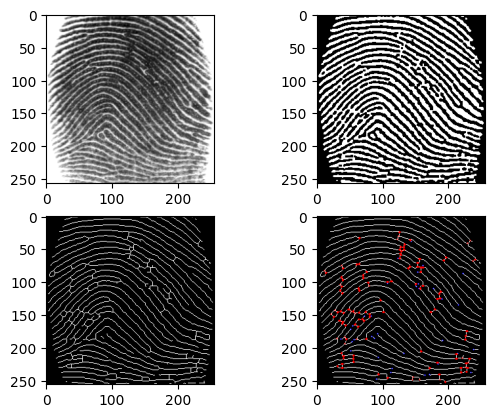

In [13]:
%%time
end, bif, minutiae = fp.get_fp_feature(image, flg_show=True)

### Match fingerprint images

distances = 107.48760113441963
match score = 94.44444444444444
CPU times: user 162 ms, sys: 13 ms, total: 175 ms
Wall time: 184 ms


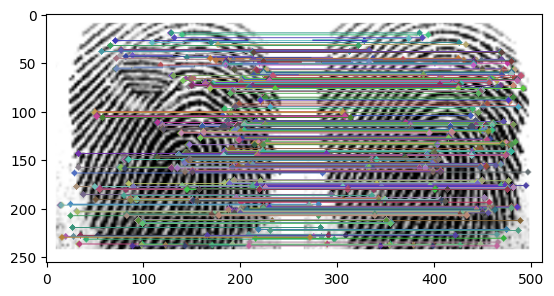

In [6]:
%%time
test_end, test_bif, test_m = fp.get_fp_feature(img_test, flg_show=False)
train_end, train_bif, train_m = fp.get_fp_feature(img_train, flg_show=False)

feat_query = np.concatenate([test_end, test_bif]).astype(np.uint8)
feat_train = np.concatenate([train_end, train_bif]).astype(np.uint8)

distances, match_score = fp.match_finger(feat_query, feat_train, 10, flg_show=True, img_A=img_test, img_B=img_train)
print(f"distances = {distances}\nmatch score = {match_score}")

### Prediction1 - 10 images

In [7]:
%%time
b_img, b_score, b_dist = fp.find_match(img_test, list_train, 5)
print(b_img, b_score, b_dist)

100.BMP 91.91919191919192 28.363070516249607
CPU times: user 4.54 s, sys: 59.2 ms, total: 4.6 s
Wall time: 4.84 s


In [8]:
%%time
list_test2_test = list_test2[:10]
predictions10 = []
labels10 = []

for test in tqdm(list_test2_test):
    test_img = cv2.imread(test, 0)
    pred_img, _, _ = fp.find_match(test_img, list_train, 5)

    pred_len = len(pred_img)
    if pred_len in [5, 6, 7]:
        predictions10.append(int(pred_img[0:pred_len-4]))
    
    label = os.path.basename(test)
    label_len = len(label)
    if label_len in [11, 12, 13]:
        labels10.append(int(label[0:label_len-10]))

  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: user 46.2 s, sys: 452 ms, total: 46.6 s
Wall time: 46.7 s


In [9]:
fp.calculateAccuracy(predictions10, labels10)

Success: 10 out of 10
Accuracy: 100.0


### Prediction - 1428 images

In [10]:
%%time
predictions = []
labels = []

for test in tqdm(list_test2):
    test_img = cv2.imread(test, 0)
    pred_img, _, _ = fp.find_match(test_img, list_train, 5)

    pred_len = len(pred_img)
    if pred_len in [5, 6, 7]:
        predictions.append(int(pred_img[0:pred_len-4]))
    
    label = os.path.basename(test)
    label_len = len(label)
    if label_len in [11, 12, 13]:
        labels.append(int(label[0:label_len-10]))

  0%|          | 0/1428 [00:00<?, ?it/s]

CPU times: user 1h 53min 37s, sys: 59.1 s, total: 1h 54min 36s
Wall time: 1h 54min 56s


In [12]:
fp.calculateAccuracy(predictions, labels)

Success: 1428 out of 1428
Accuracy: 100.0
